# Julien's Notebook
Here is all my work for Overcome Tomorrow project detailed by issues

## Cleanup and build Aggregator dataset 

### Dataset

In [117]:
# Import 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

# Sklearn library
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [169]:
pd.set_option('display.max_columns',None)
dossier = os.path.join('..','raw_data','Aggregator')
dataframes =[]
for fichier in os.listdir(dossier):
    chemin_complet = os.path.join(dossier, fichier)
    if fichier.endswith('.json'):
        df_test = pd.read_json(chemin_complet)
        dataframes.append(df_test)

# Concaténer tous les DataFrames dans un seul DataFrame
df = pd.concat(dataframes, ignore_index=True)
df['calendarDate'] = pd.to_datetime(df['calendarDate'])
df = df.sort_values(by='calendarDate', ascending=True)
df = df.loc[df['calendarDate'] >= pd.Timestamp('2019-01-01')]
df = df.drop_duplicates(subset=['calendarDate'], keep='first')
df.set_index('calendarDate',inplace=True)
# Afficher les premières lignes du DataFrame concaténé pour vérification
df.head(5)

,userProfilePK,uuid,durationInMilliseconds,totalKilocalories,activeKilocalories,bmrKilocalories,wellnessKilocalories,wellnessTotalKilocalories,wellnessActiveKilocalories,totalSteps,dailyStepGoal,totalDistanceMeters,wellnessDistanceMeters,wellnessStartTimeGmt,wellnessEndTimeGmt,wellnessStartTimeLocal,wellnessEndTimeLocal,moderateIntensityMinutes,vigorousIntensityMinutes,floorsAscendedInMeters,includesWellnessData,includesActivityData,includesCalorieConsumedData,source,allDayStress,version,remainingKilocalories,includesSingleMeasurement,includesContinuousMeasurement,includesAllDayPulseOx,includesSleepPulseOx,burnedKilocalories,userIntensityMinutesGoal,highlyActiveSeconds,activeSeconds,floorsDescendedInMeters,userFloorsAscendedGoal,minHeartRate,maxHeartRate,restingHeartRate,currentDayRestingHeartRate,restingHeartRateTimestamp,bodyBattery,minAvgHeartRate,maxAvgHeartRate,averageMonitoringEnvironmentAltitude,consumedKilocalories,netCalorieGoal,averageSpo2Value,lowestSpo2Value,latestSpo2Value,latestSpo2ValueReadingTimeGmt,latestSpo2ValueReadingTimeLocal,hydration,respiration,restingCaloriesFromActivity,totalPushes,pushDistance,jetLagDay,jetLagTripName,jetLagTripPk,bodyBatteryFeedback,isVigorousDay,dailyTotalFromEpochData
calendarDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-14,79187125,6e4383fc76924c33bce1b737de7e1d45,0,2521.0,2521.0,NaN,NaN,2521.0,NaN,NaN,NaN,42241.0,NaN,2019-04-13T23:00:00.0,2019-04-14T23:00:00.0,2019-04-14T00:00:00.0,2019-04-15T00:00:00.0,NaN,NaN,NaN,False,True,False,0.0,{},2,2521.0,NaN,NaN,NaN,NaN,2521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01,79187125,259b0b90d972499f9bcf73e53decc850,86400000,3279.0,1947.0,1332.0,3279.0,3279.0,1947.0,19657.0,10000.0,14610.0,14610.0,2019-07-01T00:00:00.0,2019-07-02T00:00:00.0,2019-07-01T00:00:00.0,2019-07-02T00:00:00.0,63.0,60.0,179.832,True,False,False,1.0,{},1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,79187125,caef3ffac2434452bc95a813d53b0533,86400000,3334.0,1952.0,1382.0,3334.0,3334.0,1952.0,19295.0,10000.0,19520.0,19520.0,2019-07-02T00:00:00.0,2019-07-03T00:00:00.0,2019-07-02T00:00:00.0,2019-07-03T00:00:00.0,18.0,77.0,167.640,True,False,False,1.0,{},1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,79187125,bd128fd907034ac0807a688569775226,86400000,2594.0,1159.0,1435.0,2594.0,2594.0,1159.0,11939.0,10000.0,8880.0,8880.0,2019-07-03T00:00:00.0,2019-07-04T00:00:00.0,2019-07-03T00:00:00.0,2019-07-04T00:00:00.0,11.0,31.0,94.488,True,False,False,1.0,{},1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-04,79187125,32dcddbc263344ccba7b5c449a3a40a2,86400000,3403.0,2056.0,1347.0,3403.0,3403.0,2056.0,19095.0,10000.0,19070.0,19070.0,2019-07-04T00:00:00.0,2019-07-05T00:00:00.0,2019-07-04T00:00:00.0,2019-07-05T00:00:00.0,18.0,80.0,173.736,True,False,False,1.0,{},1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Récupérons les valeurs intéressantes qui sont dans hydration et ajoutons les au dataframe avant de trier les features

In [170]:
# Hydration
df['hydration_sweatLossInML'] = df['hydration'].apply(lambda x: x.get('sweatLossInML') if isinstance(x, dict) else None)

Pour l'hydratation nous gardons que cette donnée car les autres données ne sont pas assez grandes

Faisons de même pour respiration, allDayStress, bodyBattery (mettons de côté bodyBatteryFeedback pour l'instant)

In [171]:
# Respiration 
df['respiration_avgWakingRespirationValue'] = df['respiration'].apply(lambda x: x.get('avgWakingRespirationValue') if isinstance(x, dict) else None)
df['respiration_highestRespirationValue'] = df['respiration'].apply(lambda x: x.get('highestRespirationValue') if isinstance(x, dict) else None)
df['respiration_lowestRespirationValue'] = df['respiration'].apply(lambda x: x.get('lowestRespirationValue') if isinstance(x, dict) else None)

In [172]:
# bodyBattery
df['bodyBattery_Highest'] = df['bodyBattery'].apply(lambda x: x.get('bodyBatteryStatList')[0].get('statsValue') if isinstance(x, dict) and isinstance(x.get('bodyBatteryStatList'), list) and len(x.get('bodyBatteryStatList')) > 0 else None)
df['bodyBattery_Lowest'] = df['bodyBattery'].apply(lambda x: x.get('bodyBatteryStatList')[1].get('statsValue') if isinstance(x, dict) and isinstance(x.get('bodyBatteryStatList'), list) and len(x.get('bodyBatteryStatList')) > 0 else None)

In [173]:
# allDayStress
df['allDayStress_awake'] = df['allDayStress'].apply(lambda x: x.get('aggregatorList')[1].get('averageStressLevel') if isinstance(x, dict) and isinstance(x.get('aggregatorList'), list) and len(x.get('aggregatorList')) > 0 else None)
df['allDayStress_asleep'] = df['allDayStress'].apply(lambda x: x.get('aggregatorList')[2].get('averageStressLevel') if isinstance(x, dict) and isinstance(x.get('aggregatorList'), list) and len(x.get('aggregatorList')) > 0 else None)

In [174]:
features_to_drop = ['userProfilePK',
                    'uuid', 'durationInMilliseconds',
                    'dailyStepGoal',
                    'netCalorieGoal',
                    'wellnessStartTimeGmt',
                    'wellnessEndTimeGmt',
                    'userIntensityMinutesGoal',
                    'userFloorsAscendedGoal',
                    'includesWellnessData',
                    'includesActivityData', 'includesCalorieConsumedData',
                    'includesSingleMeasurement', 'includesContinuousMeasurement',
                    'includesAllDayPulseOx', 'includesSleepPulseOx', 'source',
                    'version','isVigorousDay',
                    'restingHeartRateTimestamp',
                    'burnedKilocalories', 'consumedKilocalories','wellnessStartTimeLocal','wellnessEndTimeLocal',
                    'moderateIntensityMinutes','vigorousIntensityMinutes','averageMonitoringEnvironmentAltitude',
                     ## Features extraites
                    'respiration','bodyBattery','hydration','allDayStress','bodyBatteryFeedback',
                     ## Doublon entre les calories "Wellness"
                    'wellnessKilocalories','remainingKilocalories','wellnessTotalKilocalories','wellnessActiveKilocalories',
                    'bmrKilocalories',
                     ## Data leakage
                    'totalSteps','minHeartRate','maxHeartRate','currentDayRestingHeartRate',
                     ## Colonne que des NaN qui provient surement de donnée de 2006 qui sont plus dans les datasets 2024
                    'averageSpo2Value','lowestSpo2Value','latestSpo2Value','latestSpo2ValueReadingTimeGmt','latestSpo2ValueReadingTimeLocal',
                    'restingCaloriesFromActivity','totalPushes','pushDistance','jetLagDay','jetLagTripName','jetLagTripPk','dailyTotalFromEpochData']



In [175]:
wellness = df.drop(columns=features_to_drop)

In [176]:
wellness.head(5)

,totalKilocalories,activeKilocalories,totalDistanceMeters,wellnessDistanceMeters,floorsAscendedInMeters,highlyActiveSeconds,activeSeconds,floorsDescendedInMeters,restingHeartRate,minAvgHeartRate,maxAvgHeartRate,hydration_sweatLossInML,respiration_avgWakingRespirationValue,respiration_highestRespirationValue,respiration_lowestRespirationValue,bodyBattery_Highest,bodyBattery_Lowest,allDayStress_awake,allDayStress_asleep
calendarDate,,,,,,,,,,,,,,,,,,,
2019-04-14,2521.0,2521.0,42241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01,3279.0,1947.0,14610.0,14610.0,179.832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,3334.0,1952.0,19520.0,19520.0,167.640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,2594.0,1159.0,8880.0,8880.0,94.488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-04,3403.0,2056.0,19070.0,19070.0,173.736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
wellness.tail(5)

,totalKilocalories,activeKilocalories,totalDistanceMeters,wellnessDistanceMeters,floorsAscendedInMeters,highlyActiveSeconds,activeSeconds,floorsDescendedInMeters,restingHeartRate,minAvgHeartRate,maxAvgHeartRate,hydration_sweatLossInML,respiration_avgWakingRespirationValue,respiration_highestRespirationValue,respiration_lowestRespirationValue,bodyBattery_Highest,bodyBattery_Lowest,allDayStress_awake,allDayStress_asleep
calendarDate,,,,,,,,,,,,,,,,,,,
2024-03-12,4525.0,2588.0,86985.0,16402.0,102.992,6356.0,1789.0,55.709,39.0,38.0,160.0,2655.0,13.0,20.0,9.0,64.0,23.0,27.0,25.0
2024-03-13,4509.0,2576.0,87474.0,16843.0,86.614,6225.0,1744.0,58.163,39.0,38.0,150.0,2382.0,13.0,19.0,9.0,61.0,24.0,28.0,24.0
2024-03-14,4563.0,2622.0,87184.0,16435.0,84.226,5810.0,2023.0,60.632,40.0,35.0,149.0,2139.0,13.0,20.0,7.0,62.0,26.0,27.0,21.0
2024-03-15,4204.0,2252.0,82879.0,10263.0,70.453,1676.0,4010.0,48.237,40.0,40.0,177.0,1594.0,13.0,19.0,8.0,78.0,25.0,26.0,17.0
2024-03-16,297.0,6.0,88.0,88.0,0.000,120.0,78.0,0.000,40.0,50.0,74.0,NaN,14.0,20.0,12.0,54.0,40.0,42.0,28.0


In [178]:
wellness.shape

(1703, 19)

Maintenant que nous avons trié les colonnes que nous allons garder pour la première itération, rentrons un peu plus dans l'analyse et le preprocessing de notre dataset

### Analysis

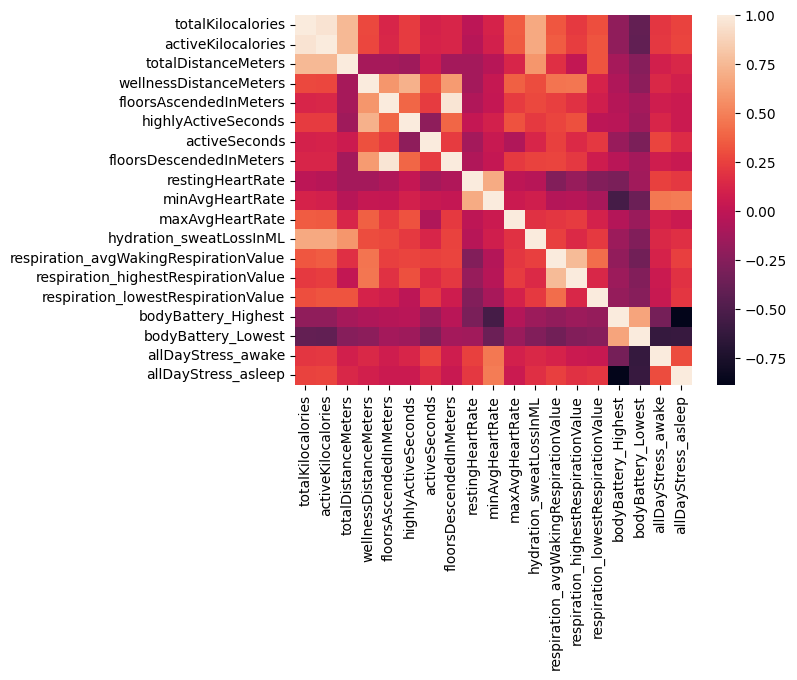

In [186]:
sns.heatmap(wellness.corr())
plt.show()

<Axes: xlabel='bodyBattery_Lowest', ylabel='allDayStress_asleep'>

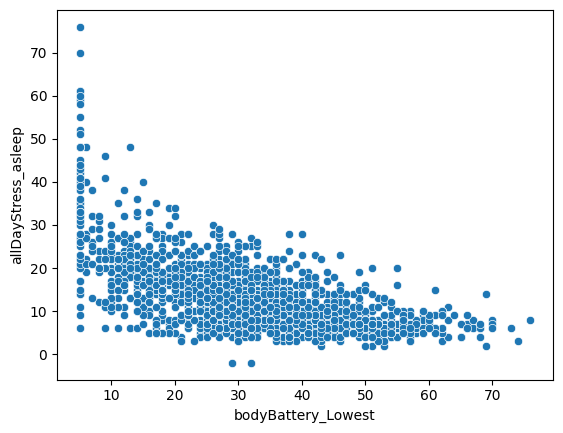

In [180]:
sns.scatterplot(x='bodyBattery_Lowest',y='allDayStress_asleep',data=wellness)

### Preprocessing

Regardons la proportion des Nan dans le dataset

In [10]:
from overcome_tomorrow.utils import * 

In [13]:
all_df = data.merge_all_data(sleep_path="../raw_data/Wellness",
                   fitness_path="../raw_data/Fitness",
                   aggregator_path="../raw_data/Aggregator")

✅ ../raw_data/Wellness loaded
✅ Wellness cleaned
✅ ../raw_data/Fitness loaded
✅ Fitness cleaned


/Users/julienrallier/code/nicblanc/overcome-tomorrow/overcome_tomorrow/utils/data.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_fitness_df["date"] = pd.to_datetime(clean_fitness_df["beginTimestamp"], unit="ms").dt.date
/Users/julienrallier/code/nicblanc/overcome-tomorrow/overcome_tomorrow/utils/data.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_fitness_df["date"] = pd.to_datetime(clean_fitness_df["date"])
/Users/julienrallier/code/nicblanc/overcome-tomorrow/overcome_tomorrow/util

✅ ../raw_data/Aggregator loaded
✅ Aggregator cleaned
✅ Datasets merged


In [14]:
all_df.head(5)

,start_sleep,end_sleep,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,qualityScore,beginTimestamp,activityTrainingLoad,activityType,...,minAvgHeartRate,maxAvgHeartRate,hydration_sweatLossInML,respiration_avgWakingRespirationValue,respiration_highestRespirationValue,respiration_lowestRespirationValue,bodyBattery_Highest,bodyBattery_Lowest,allDayStress_awake,allDayStress_asleep
calendarDate,,,,,,,,,,,,,,,,,,,,,
2019-08-29,2019-08-28 20:30:00,2019-08-29 05:00:00,NaN,NaN,NaN,NaN,NaN,2019-08-29 19:23:03,5.244644,walking,...,50.0,101.0,NaN,NaN,NaN,NaN,69.0,45.0,18.0,11.0
2019-08-29,2019-08-28 20:30:00,2019-08-29 05:00:00,NaN,NaN,NaN,NaN,NaN,2019-08-29 17:41:54,2.278595,other,...,50.0,101.0,NaN,NaN,NaN,NaN,69.0,45.0,18.0,11.0
2019-08-29,2019-08-28 20:30:00,2019-08-29 05:00:00,NaN,NaN,NaN,NaN,NaN,2019-08-29 09:39:26,NaN,running,...,50.0,101.0,NaN,NaN,NaN,NaN,69.0,45.0,18.0,11.0
2019-08-30,2019-08-29 21:12:00,2019-08-30 05:08:00,5340.0,17940.0,4920.0,360.0,NaN,2019-08-30 17:38:42,8.112671,strength_training,...,46.0,119.0,NaN,NaN,NaN,NaN,100.0,66.0,20.0,6.0
2019-08-30,2019-08-29 21:12:00,2019-08-30 05:08:00,5340.0,17940.0,4920.0,360.0,NaN,2019-08-30 17:19:21,1.880997,other,...,46.0,119.0,NaN,NaN,NaN,NaN,100.0,66.0,20.0,6.0


In [184]:
wellness_preprocessed = preprocessor.fit_transform(wellness)
wellness_preprocessed.head(5)

,totalKilocalories,activeKilocalories,totalDistanceMeters,wellnessDistanceMeters,floorsAscendedInMeters,highlyActiveSeconds,activeSeconds,floorsDescendedInMeters,restingHeartRate,minAvgHeartRate,maxAvgHeartRate,hydration_sweatLossInML,respiration_avgWakingRespirationValue,respiration_highestRespirationValue,respiration_lowestRespirationValue,bodyBattery_Highest,bodyBattery_Lowest,allDayStress_awake,allDayStress_asleep
calendarDate,,,,,,,,,,,,,,,,,,,
2019-04-14,2521.0,2521.0,42241.0,18680.005316,95.986247,4706.562575,9007.837545,86.243321,42.354392,39.809868,151.591456,1107.557909,13.378296,22.732066,8.408338,87.643803,31.868231,31.623345,13.348977
2019-07-01,3279.0,1947.0,14610.0,14610.000000,179.832000,4706.562575,9007.837545,86.243321,42.354392,39.809868,151.591456,1107.557909,13.378296,22.732066,8.408338,87.643803,31.868231,31.623345,13.348977
2019-07-02,3334.0,1952.0,19520.0,19520.000000,167.640000,4706.562575,9007.837545,86.243321,42.354392,39.809868,151.591456,1107.557909,13.378296,22.732066,8.408338,87.643803,31.868231,31.623345,13.348977
2019-07-03,2594.0,1159.0,8880.0,8880.000000,94.488000,4706.562575,9007.837545,86.243321,42.354392,39.809868,151.591456,1107.557909,13.378296,22.732066,8.408338,87.643803,31.868231,31.623345,13.348977
2019-07-04,3403.0,2056.0,19070.0,19070.000000,173.736000,4706.562575,9007.837545,86.243321,42.354392,39.809868,151.591456,1107.557909,13.378296,22.732066,8.408338,87.643803,31.868231,31.623345,13.348977


In [185]:
wellness_preprocessed.isna().sum().sort_values(ascending=False)/len(wellness)

totalKilocalories                        0.0
maxAvgHeartRate                          0.0
allDayStress_awake                       0.0
bodyBattery_Lowest                       0.0
bodyBattery_Highest                      0.0
respiration_lowestRespirationValue       0.0
respiration_highestRespirationValue      0.0
respiration_avgWakingRespirationValue    0.0
hydration_sweatLossInML                  0.0
minAvgHeartRate                          0.0
activeKilocalories                       0.0
restingHeartRate                         0.0
floorsDescendedInMeters                  0.0
activeSeconds                            0.0
highlyActiveSeconds                      0.0
floorsAscendedInMeters                   0.0
wellnessDistanceMeters                   0.0
totalDistanceMeters                      0.0
allDayStress_asleep                      0.0
dtype: float64

On a donc plus de NaN dans notre dataset il est prêt à être envoyé, le scaling des données se fera ici ou une fois le dataset cleané

## Test Summarized activities

In [2]:
import requests
import json

In [3]:
response = requests.get('http://0.0.0.0:8000/activities?activity_datetime=2024-03-04&summarized=false').json()

In [5]:
response_dict = json.loads(response[0])

In [7]:
response_dict['heart_rate']

{'1696768318000': 90.0,
 '1696768319000': 90.0,
 '1696768320000': 93.0,
 '1696768321000': 94.0,
 '1696768322000': 95.0,
 '1696768323000': 102.0,
 '1696768324000': 103.0,
 '1696768325000': 104.0,
 '1696768326000': 108.0,
 '1696768327000': 108.0,
 '1696768328000': 110.0,
 '1696768329000': 112.0,
 '1696768330000': 119.0,
 '1696768331000': 121.0,
 '1696768332000': 124.0,
 '1696768333000': 124.0,
 '1696768334000': 125.0,
 '1696768335000': 128.0,
 '1696768336000': 134.0,
 '1696768337000': 137.0,
 '1696768338000': 138.0,
 '1696768339000': 138.0,
 '1696768340000': 138.0,
 '1696768341000': 139.0,
 '1696768342000': 139.0,
 '1696768343000': 139.0,
 '1696768344000': 138.0,
 '1696768345000': 138.0,
 '1696768346000': 138.0,
 '1696768347000': 139.0,
 '1696768348000': 139.0,
 '1696768349000': 138.0,
 '1696768350000': 138.0,
 '1696768351000': 138.0,
 '1696768352000': 138.0,
 '1696768353000': 138.0,
 '1696768354000': 138.0,
 '1696768355000': 138.0,
 '1696768356000': 138.0,
 '1696768357000': 138.0,
 '169

 137 : stamina 
 138 : stamina potentiel
 90 : perf condition physique
 178 : Estimation transpiration
 188 : Primary benefit
 205 : Beginning potential stamina
 206 : Ending potential stamina
 207 : Min stamina